Importo las librerias necesarias, incluyendo las de preprocesamiento, entrenamiento y evaluación.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
)


In [4]:
df= pd.read_csv("EMG_Features.csv")
df

,RMS_Biceps,MAV_Biceps,VAR_Biceps,ZC_Biceps,IMEG_Biceps,MEANF_Biceps,MDF_Biceps,SPECTRAL_ENT_Biceps,RMS_Triceps,MAV_Triceps,VAR_Triceps,ZC_Triceps,IMEG_Triceps,MEANF_Triceps,MDF_Triceps,SPECTRAL_ENT_Triceps,Target
0,0.000054,0.000046,2.877636e-09,13,0.009216,55.919464,60.0,1.392794,0.000161,0.000133,2.598678e-08,12,0.026583,60.653539,60.0,0.999155,0.0
1,0.000035,0.000026,1.200250e-09,13,0.005259,39.733812,40.0,2.053394,0.000078,0.000057,6.025554e-09,19,0.011488,64.800248,60.0,1.333861,0.0
2,0.000016,0.000013,2.643661e-10,15,0.002686,67.755072,50.0,2.664580,0.000031,0.000024,9.077925e-10,22,0.004893,110.965196,60.0,2.145303,0.0
3,0.000024,0.000016,5.428025e-10,16,0.003242,43.452541,40.0,2.118086,0.000033,0.000028,1.101355e-09,16,0.005670,80.712859,60.0,1.535873,0.0
4,0.000023,0.000015,4.815328e-10,16,0.002972,58.452967,60.0,2.448056,0.000038,0.000034,1.411730e-09,12,0.006775,74.454843,60.0,1.432573,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12413,0.000118,0.000084,1.383804e-08,16,0.016724,44.779334,40.0,2.248886,0.000406,0.000295,1.648139e-07,11,0.058963,73.001348,80.0,2.294145,1.0
12414,0.000072,0.000054,5.112447e-09,19,0.010888,49.540454,30.0,2.211320,0.000290,0.000194,8.184051e-08,11,0.038831,47.272126,50.0,1.968698,1.0
12415,0.000087,0.000069,7.562360e-09,18,0.013798,85.696916,90.0,2.325793,0.000196,0.000146,3.807773e-08,14,0.029117,75.684680,80.0,2.435941,1.0
12416,0.000092,0.000078,8.525652e-09,14,0.015602,80.356192,80.0,2.536613,0.000234,0.000181,5.437050e-08,16,0.036139,52.743481,40.0,2.276363,1.0


Luego de realizar el correspondiente EDA y concluir que es util realizar un PCA, continuamos el proceso y el siguiente paso es separar nuestros datos y crear un pipepline, en el cual hagamos una normalización de los datos y apliquemos el PCA. El pipeline solo tendrá estos pasos ya que la idea es que se aplique a varios modelos.

**DIVISIÓN DE LOS DATOS**

In [5]:
X = df.drop(columns=['Target'])
y = df['Target']



print(y)


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12413    1.0
12414    1.0
12415    1.0
12416    1.0
12417    1.0
Name: Target, Length: 12418, dtype: float64


In [6]:
#Hago una división de datos 70-15-15
X_train, X_treinta, y_train, y_treinta = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
    )
X_val, X_test, y_val, y_test = train_test_split(
    X_treinta, y_treinta, test_size=0.50, random_state=42, stratify=y_treinta
)

In [7]:
print("Tamaños:")
print("Train:", X_train.shape, y_train.shape)
print("Val:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Tamaños:
Train: (8692, 16) (8692,)
Val: (1863, 16) (1863,)
Test: (1863, 16) (1863,)


**PIPELINE DE PROCESAMIENTO **



In [8]:


# Pipeline de escalado y el PCA
pipeline_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))   #Para que nos de el 95% de varianza
])

# Ajustar EL PIPELINE con train, se hace solo con este porque como sabemos se puede sesgar
pipeline_pca.fit(X_train)

# Transformar cada conjunto
X_train_pca = pipeline_pca.transform(X_train)
X_val_pca   = pipeline_pca.transform(X_val)
X_test_pca  = pipeline_pca.transform(X_test)

# Varianza explicada
pca = pipeline_pca.named_steps['pca']
print("Varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)

print("\nVarianza explicada acumulada:",
      pca.explained_variance_ratio_.sum())


Varianza explicada por cada componente:
[0.37144445 0.20124968 0.14981568 0.08190279 0.05673402 0.04973711
 0.03248761 0.02660736]

Varianza explicada acumulada: 0.9699787024598474


In [9]:
# ===========================
# 1. Crear el modelo de SVM
# ===========================
svm_model = SVC(
    kernel='rbf',       # kernel más común para EMG
    C=1.0,              # regularización
    gamma='scale',      # valor recomendado
    probability=True    # por si luego quieres ROC o probabilidades
)

# ===========================
# 2. Entrenar el modelo
# ===========================
svm_model.fit(X_train_pca, y_train)

# ===========================
# 3. Validación (opcional)
# ===========================
y_val_pred = svm_model.predict(X_val_pca)
val_acc = accuracy_score(y_val, y_val_pred)
print(f"Accuracy en validación: {val_acc:.4f}")

# ===========================
# 4. Evaluación en test
# ===========================
y_test_pred = svm_model.predict(X_test_pca)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Accuracy en test: {test_acc:.4f}")

# ===========================
# 5. Reporte completo
# ===========================
print("\nReporte de clasificación (test):")
print(classification_report(y_test, y_test_pred))

print("\nMatriz de confusión (test):")
print(confusion_matrix(y_test, y_test_pred))


Accuracy en validación: 0.9351
Accuracy en test: 0.9340

Reporte de clasificación (test):
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       958
         1.0       0.97      0.89      0.93       905

    accuracy                           0.93      1863
   macro avg       0.94      0.93      0.93      1863
weighted avg       0.94      0.93      0.93      1863


Matriz de confusión (test):
[[932  26]
 [ 97 808]]


**AHORA HACEMOS EL ANÁLISIS DE RESULTADOS**

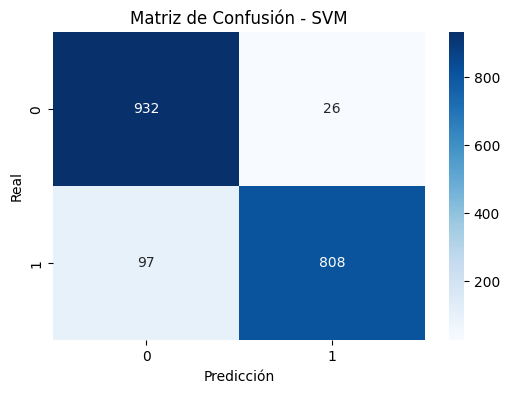

In [10]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - SVM")
plt.show()

In [11]:
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_test_pred))


Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       958
         1.0       0.97      0.89      0.93       905

    accuracy                           0.93      1863
   macro avg       0.94      0.93      0.93      1863
weighted avg       0.94      0.93      0.93      1863



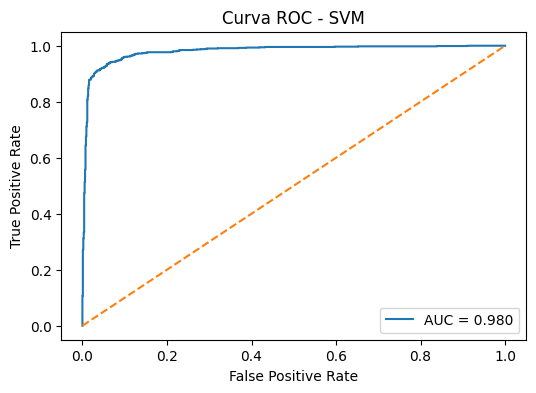

In [12]:
y_prob = svm_model.predict_proba(X_test_pca)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - SVM")
plt.legend()
plt.show()

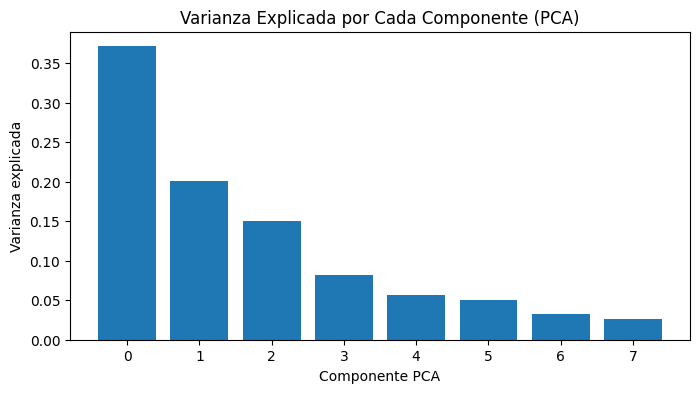

In [13]:

plt.figure(figsize=(8,4))
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.title("Varianza Explicada por Cada Componente (PCA)")
plt.xlabel("Componente PCA")
plt.ylabel("Varianza explicada")
plt.show()


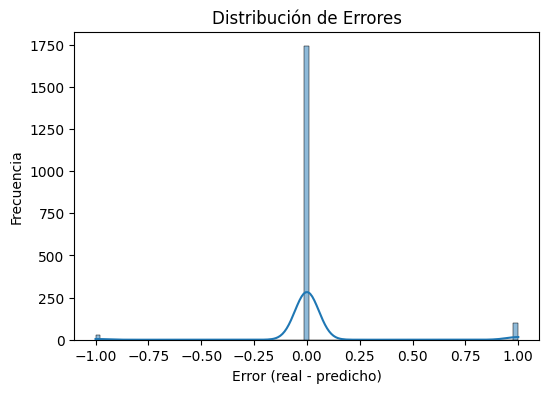

In [14]:
errores = y_test - y_test_pred

plt.figure(figsize=(6,4))
sns.histplot(errores, kde=True)
plt.title("Distribución de Errores")
plt.xlabel("Error (real - predicho)")
plt.ylabel("Frecuencia")
plt.show()

In [15]:
def evaluar_train_val_test_final(
        modelo,
        X_train, y_train,
        X_val,   y_val,
        X_test,  y_test,
        nombre="Modelo",
        threshold=0.5
):
    """
    Evalúa Train, Validación y Test y muestra las métricas horizontales.
    También imprime:
        - Classification report
        - Matriz de confusión
        - Matriz normalizada
        - Curva ROC comparativa
    """

    resultados = {}

    
    # ayuda para evaluar un conjunto
    def _eval_split(X, y, split_name):
        print(f"\n              {split_name}               ")

        loss, acc, auc_score = modelo.evaluate(X, y, verbose=0)

        y_proba = modelo.predict(X, verbose=0).ravel()
        y_pred = (y_proba >= threshold).astype(int)

        # Reports
        print(f"\n Classification Report - {split_name}:")
        print(classification_report(y, y_pred, digits=4))

        cm = confusion_matrix(y, y_pred)

        # Confusion Matrix Plot
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=["Pred 0", "Pred 1"],
                    yticklabels=["Real 0", "Real 1"])
        plt.title(f"{nombre} - Matriz de Confusión ({split_name})")
        plt.tight_layout()
        plt.show()


        # ROC
        fpr, tpr, _ = roc_curve(y, y_proba)
        roc_auc = auc(fpr, tpr)

        return {
            "loss": loss,
            "accuracy": acc,
            "auc": auc_score,
            "cm": cm,
            "fpr": fpr,
            "tpr": tpr,
            "roc_auc": roc_auc
        }

    
    # Evaluar los tres conjuntos
    res_train = _eval_split(X_train, y_train, "TRAIN")
    res_val   = _eval_split(X_val,   y_val,   "VALIDACIÓN")
    res_test  = _eval_split(X_test,  y_test,  "TEST")

    resultados["train"] = res_train
    resultados["val"]   = res_val
    resultados["test"]  = res_test

    # TABLA HORIZONTAL
    tabla = pd.DataFrame({
        "Train": {
            "Loss": res_train["loss"],
            "Accuracy": res_train["accuracy"],
            "AUC": res_train["auc"]
        },
        "Validación": {
            "Loss": res_val["loss"],
            "Accuracy": res_val["accuracy"],
            "AUC": res_val["auc"]
        },
        "Test": {
            "Loss": res_test["loss"],
            "Accuracy": res_test["accuracy"],
            "AUC": res_test["auc"]
        }
    })

    
    print(" RESUMEN HORIZONTAL DE MÉTRICAS (TRAIN | VAL | TEST)")

    display(tabla)


    # Curva ROC comparativa
    plt.figure(figsize=(7, 6))
    plt.plot(res_train["fpr"], res_train["tpr"],
             label=f"Train (AUC = {res_train['roc_auc']:.3f})")
    plt.plot(res_val["fpr"], res_val["tpr"],
             label=f"Val (AUC = {res_val['roc_auc']:.3f})")
    plt.plot(res_test["fpr"], res_test["tpr"],
             label=f"Test (AUC = {res_test['roc_auc']:.3f})")

    plt.plot([0, 1], [0, 1], "k--", label="Azar (0.5)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{nombre} - ROC Comparativa (Train vs Val vs Test)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return resultados, tabla

In [16]:
resultados, tabla = evaluar_train_val_test_final(
    svm_model,
    X_train_pca, y_train,
    X_val_pca,   y_val,
    X_test_pca, y_test,
    nombre="DNN caracteristicas 32-16-1",
    threshold=0.5
)


              TRAIN               


AttributeError: 'SVC' object has no attribute 'evaluate'